In [1]:
# Import libraries
import sys
import os
import json 
import pandas as pd
import matplotlib.pylab as plt

In [2]:
from compositionspace.datautils import DataPreparation

from compositionspace.segmentation import CompositionClustering
from compositionspace.postprocessing import DataPostprocess

In [3]:
data = DataPreparation("experiment_params.yaml")
data.get_big_slices()
data.get_voxels()
data.calculate_voxel_composition()

Reading files:   0%|          | 0/2 [00:00<?, ?it/s]

Creating chunks:   0%|          | 0/10 [00:00<?, ?it/s]

Getting Voxels:   0%|          | 0/10 [00:00<?, ?it/s]

Calculating voxel composition:   0%|          | 0/8846 [00:00<?, ?it/s]

In [4]:
data.chunk_files

['output/file_R31_06365-v02_pos_large_chunks_arr.h5']

In [5]:
data.voxel_files

['output/file_R31_06365-v02_pos_small_chunks_arr.h5']

In [6]:
data.voxel_ratio_file

'output/output_vox_ratio_composition.h5'

8846
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', 'Total_no', 'vox']


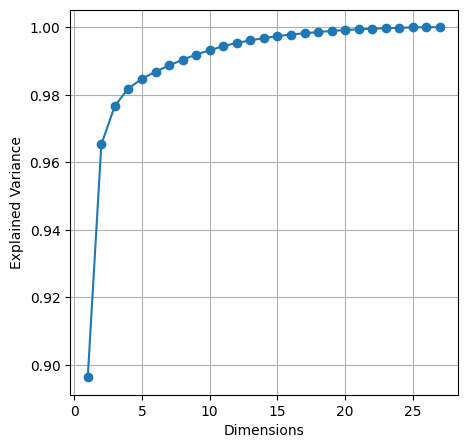

In [7]:
comps = CompositionClustering("experiment_params.yaml")
res = comps.get_PCA_cumsum(data.voxel_ratio_file, data.voxel_files[0])

Clustering:   0%|          | 0/9 [00:00<?, ?it/s]

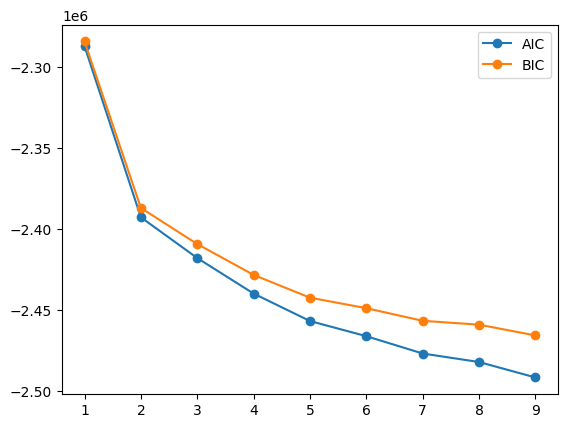

In [8]:
res = comps.get_bics_minimization(data.voxel_ratio_file, data.voxel_files[0])

In [9]:
comps.get_composition_clusters(data.voxel_ratio_file, data.voxel_files[0])

In [10]:
comps.generate_plots()

In [11]:
pdata = DataPostprocess("experiment_params.yaml")

  0%|          | 0/31 [00:00<?, ?it/s]

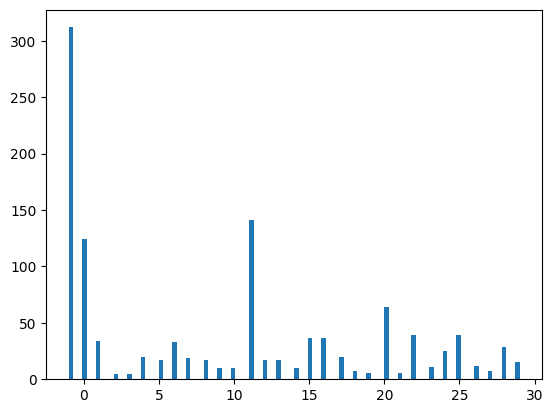

In [12]:
pdata.DBSCAN_clustering(comps.voxel_centroid_output_file, cluster_id = 0,
                        plot=True, plot3d=True, save=True)